In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dt = pd.read_csv("./clean_data_2.csv")
dt.keys()

Index(['mobile_price', 'disp_size', 'resolution', 'os', 'num_cores',
       'mp_speed', 'int_memory', 'ram', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight'],
      dtype='object')

In [4]:
dt['mobile_price']

0       8999
1       8999
2       9999
3       9999
4      11999
       ...  
454    13490
455     9490
456    22990
457    13990
458    13990
Name: mobile_price, Length: 459, dtype: int64

In [5]:
dt.head()

,mobile_price,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,8999,16.56,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0
1,8999,16.56,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0
2,9999,16.56,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0
3,9999,16.56,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0
4,11999,16.51,1152000,10,8,2.0,128,4,5000,75.4,164.4,9.00,199.0


### 1. PCA Visualization

In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(dt)
scaled_data = scalar.transform(dt)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [9]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(459, 13)
(459, 2)


#### Let's plot these two dimensions out

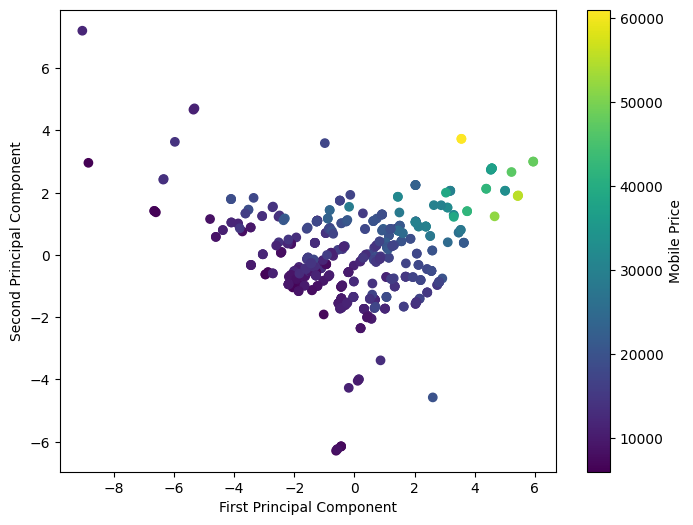

In [14]:
# plt.figure(figsize=(8, 6))
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c = dt['mobile_price'], cmap='os')
# plt.xlabel('First Princiipal Component')
# plt.ylabel('Second Princiipal Component')

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dt['mobile_price'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Mobile Price')
plt.show()


#### Interpretting the Components

In [15]:
pca.components_

array([[ 0.29505893,  0.36312358,  0.30124417,  0.31182058,  0.20475199,
         0.31948509,  0.32829998,  0.34216573,  0.23030209, -0.03680292,
         0.19030073, -0.01292929,  0.36534089],
       [ 0.36186892, -0.18007869,  0.20133553, -0.27431785, -0.17081907,
         0.16094607,  0.25676946,  0.2828031 , -0.3962188 ,  0.39984753,
        -0.29612394, -0.30351414, -0.15220948]])

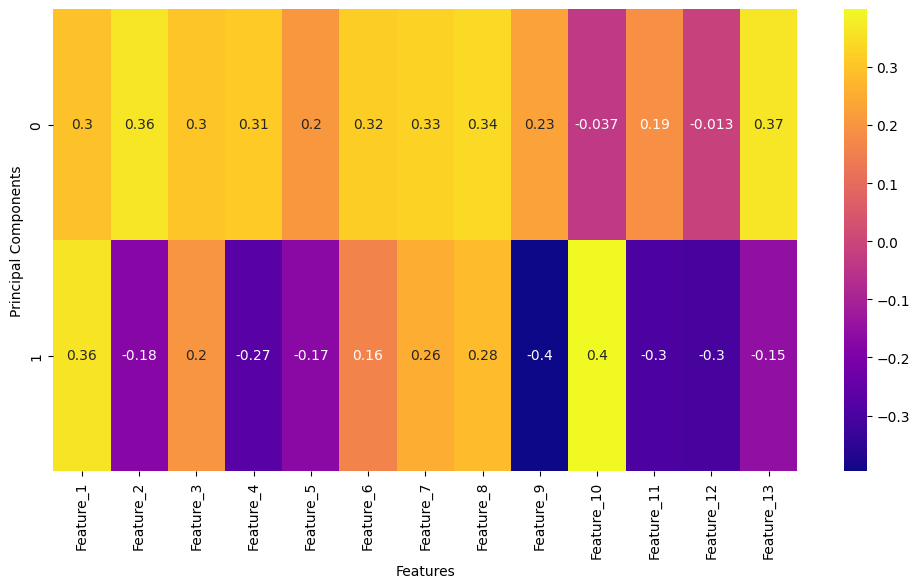

In [26]:
num_components = pca.components_.shape[0]
dt_comp = pd.DataFrame(pca.components_)
column_names = [f"Feature_{i+1}" for i in range(dt_comp.shape[1])]
dt_comp.columns = column_names

plt.figure(figsize=(12, 6))
sns.heatmap(dt_comp, cmap='plasma', annot=True)
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()